## Cancer prediction

### B = Benign Cancer
###M = Malignant Cancer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Cancer_Data.csv')
df=pd.DataFrame(df)

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
pd.set_option('display.max_columns', None)
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [8]:
df.drop('id',axis=1,inplace=True)

## Target

C:\Users\jonah\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='diagnosis', ylabel='count'>

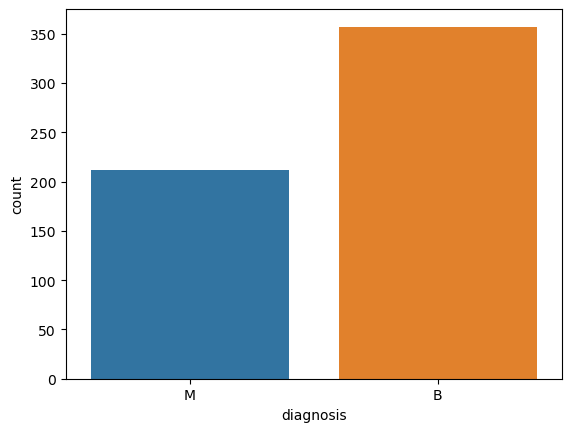

In [9]:
sns.countplot(df.diagnosis)

## boxplot

## radius_mean

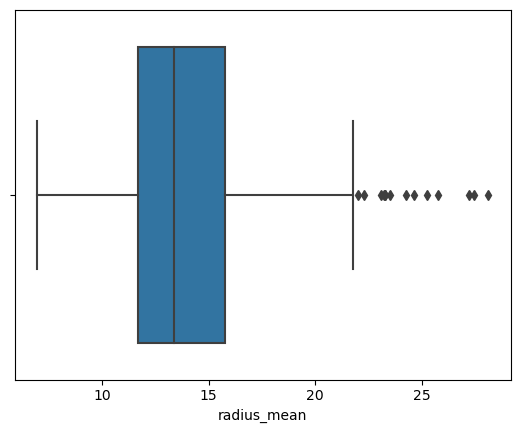

In [10]:
sns.boxplot(x="radius_mean", data=df)
plt.show()

In [11]:
q1=df['radius_mean'].quantile(0.25)
q3=df['radius_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['radius_mean']=np.where(df['radius_mean']>upper,upper,df['radius_mean'])
df['radius_mean']=np.where(df['radius_mean']<lower,lower,df['radius_mean'])

## texture_mean

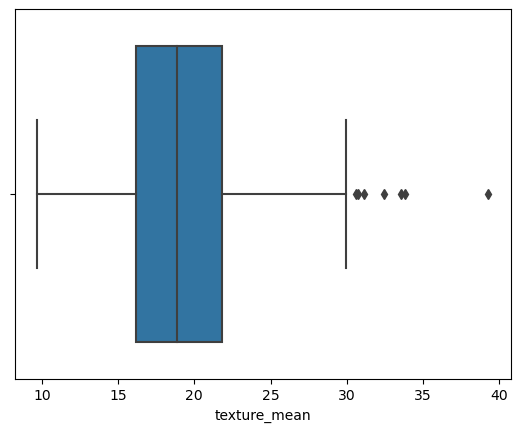

In [12]:
sns.boxplot(x="texture_mean", data=df)
plt.show()

In [13]:
q1=df['texture_mean'].quantile(0.25)
q3=df['texture_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['texture_mean']=np.where(df['texture_mean']>upper,upper,df['texture_mean'])
df['texture_mean']=np.where(df['texture_mean']<lower,lower,df['texture_mean'])

## perimeter_mean

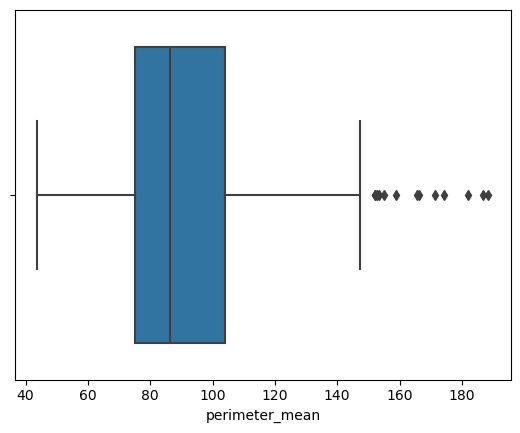

In [14]:
sns.boxplot(x="perimeter_mean", data=df)
plt.show()

In [15]:
q1=df['perimeter_mean'].quantile(0.25)
q3=df['perimeter_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['perimeter_mean']=np.where(df['perimeter_mean']>upper,upper,df['perimeter_mean'])
df['perimeter_mean']=np.where(df['perimeter_mean']<lower,lower,df['perimeter_mean'])

## area_mean

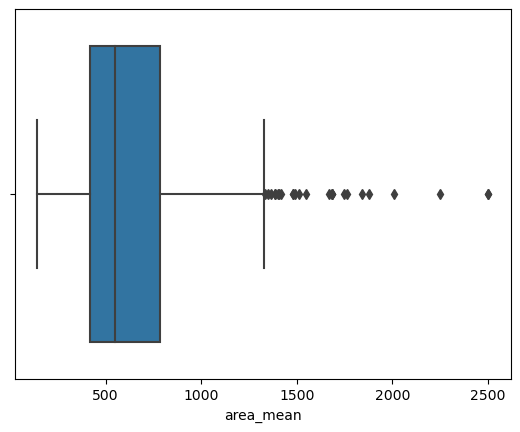

In [16]:
sns.boxplot(x="area_mean", data=df)
plt.show()

In [17]:
q1=df['area_mean'].quantile(0.25)
q3=df['area_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['area_mean']=np.where(df['area_mean']>upper,upper,df['area_mean'])
df['area_mean']=np.where(df['area_mean']<lower,lower,df['area_mean'])

## smoothness_mean

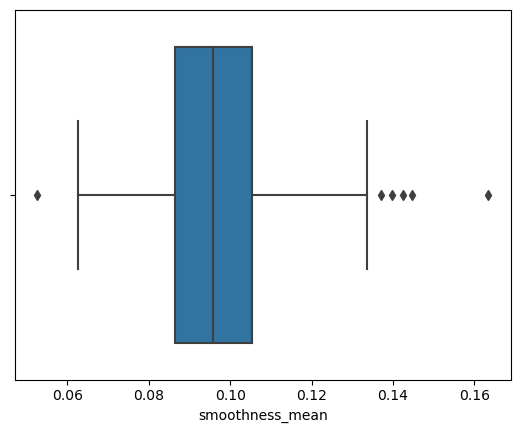

In [18]:
sns.boxplot(x="smoothness_mean", data=df)
plt.show()

In [19]:
q1=df['smoothness_mean'].quantile(0.25)
q3=df['smoothness_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['smoothness_mean']=np.where(df['smoothness_mean']>upper,upper,df['smoothness_mean'])
df['smoothness_mean']=np.where(df['smoothness_mean']<lower,lower,df['smoothness_mean'])

## compactness_mean

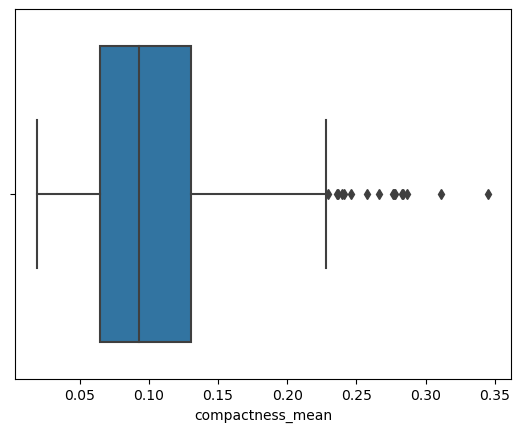

In [20]:
sns.boxplot(x="compactness_mean", data=df)
plt.show()

In [21]:
q1=df['compactness_mean'].quantile(0.25)
q3=df['compactness_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['compactness_mean']=np.where(df['compactness_mean']>upper,upper,df['compactness_mean'])
df['compactness_mean']=np.where(df['compactness_mean']<lower,lower,df['compactness_mean'])

## concavity_mean

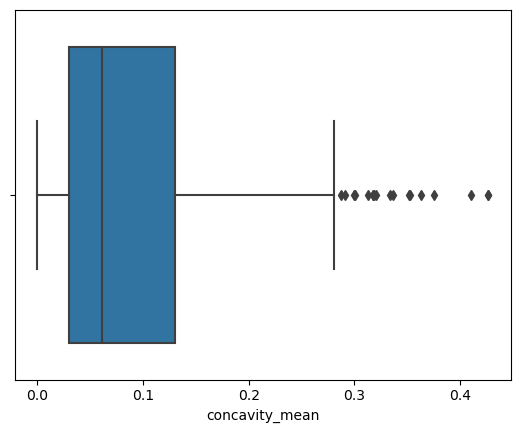

In [22]:
sns.boxplot(x="concavity_mean", data=df)
plt.show()

In [23]:
q1=df['concavity_mean'].quantile(0.25)
q3=df['concavity_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['concavity_mean']=np.where(df['concavity_mean']>upper,upper,df['concavity_mean'])
df['concavity_mean']=np.where(df['concavity_mean']<lower,lower,df['concavity_mean'])

## concave points_mean

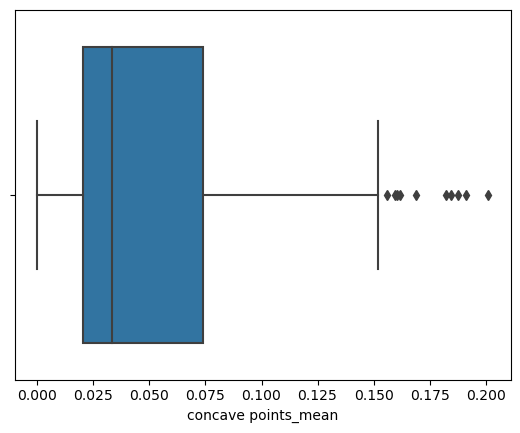

In [24]:
sns.boxplot(x="concave points_mean", data=df)
plt.show()

In [25]:
q1=df['concave points_mean'].quantile(0.25)
q3=df['concave points_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['concave points_mean']=np.where(df['concave points_mean']>upper,upper,df['concave points_mean'])
df['concave points_mean']=np.where(df['concave points_mean']<lower,lower,df['concave points_mean'])

## symmetry_mean

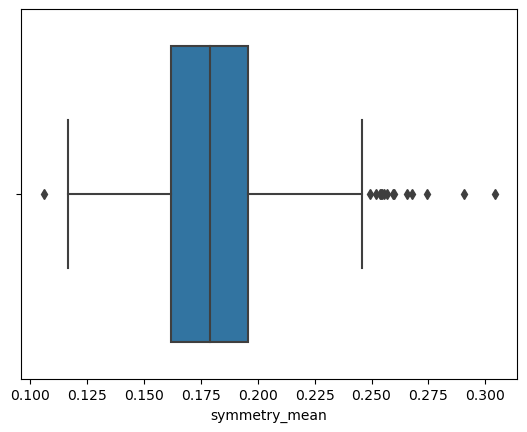

In [26]:
sns.boxplot(x="symmetry_mean", data=df)
plt.show()

In [27]:
q1=df['symmetry_mean'].quantile(0.25)
q3=df['symmetry_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['symmetry_mean']=np.where(df['symmetry_mean']>upper,upper,df['symmetry_mean'])
df['symmetry_mean']=np.where(df['symmetry_mean']<lower,lower,df['symmetry_mean'])

## fractal_dimension_mean

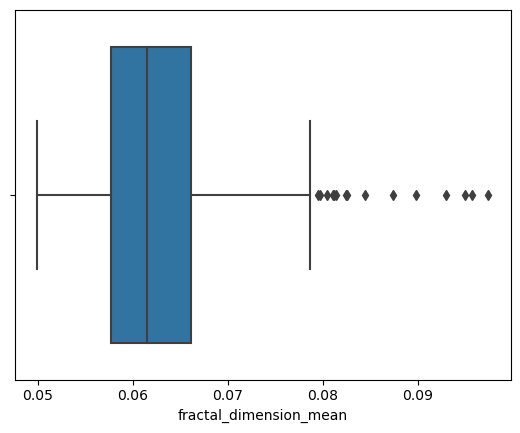

In [28]:
sns.boxplot(x="fractal_dimension_mean", data=df)
plt.show()

In [29]:
q1=df['fractal_dimension_mean'].quantile(0.25)
q3=df['fractal_dimension_mean'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['fractal_dimension_mean']=np.where(df['fractal_dimension_mean']>upper,upper,df['fractal_dimension_mean'])
df['fractal_dimension_mean']=np.where(df['fractal_dimension_mean']<lower,lower,df['fractal_dimension_mean'])

## radius_se

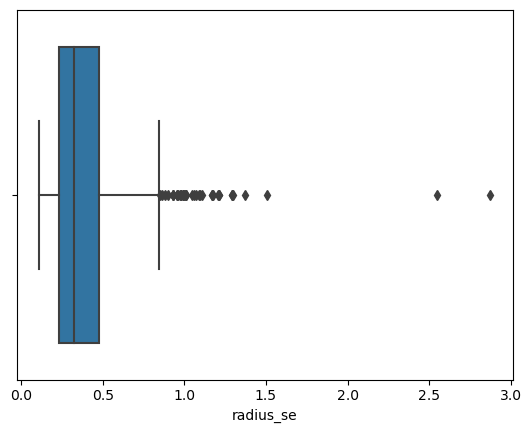

In [30]:
sns.boxplot(x="radius_se", data=df)
plt.show()

In [31]:
q1=df['radius_se'].quantile(0.25)
q3=df['radius_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['radius_se']=np.where(df['radius_se']>upper,upper,df['radius_se'])
df['radius_se']=np.where(df['radius_se']<lower,lower,df['radius_se'])

## texture_se

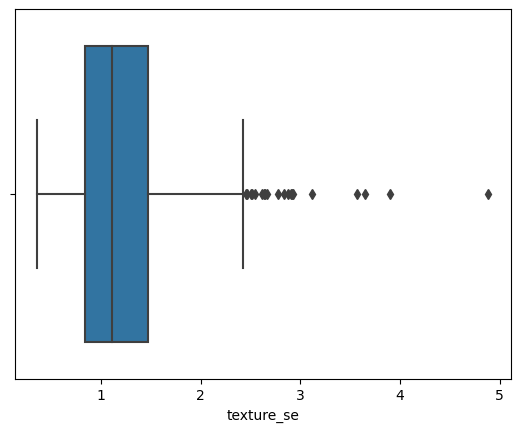

In [32]:
sns.boxplot(x="texture_se", data=df)
plt.show()

In [33]:
q1=df['texture_se'].quantile(0.25)
q3=df['texture_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['texture_se']=np.where(df['texture_se']>upper,upper,df['texture_se'])
df['texture_se']=np.where(df['texture_se']<lower,lower,df['texture_se'])

## perimeter_se

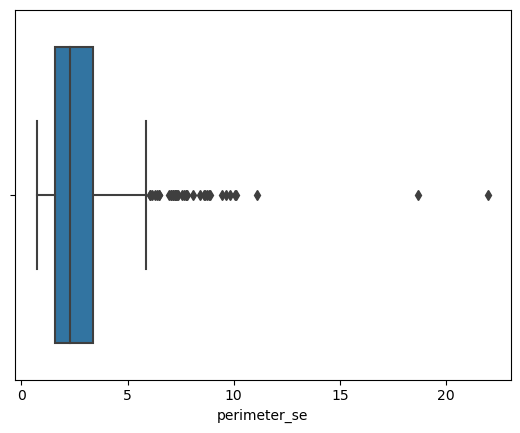

In [34]:
sns.boxplot(x="perimeter_se", data=df)
plt.show()

In [35]:
q1=df['perimeter_se'].quantile(0.25)
q3=df['perimeter_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['perimeter_se']=np.where(df['perimeter_se']>upper,upper,df['perimeter_se'])
df['perimeter_se']=np.where(df['perimeter_se']<lower,lower,df['perimeter_se'])

## area_se

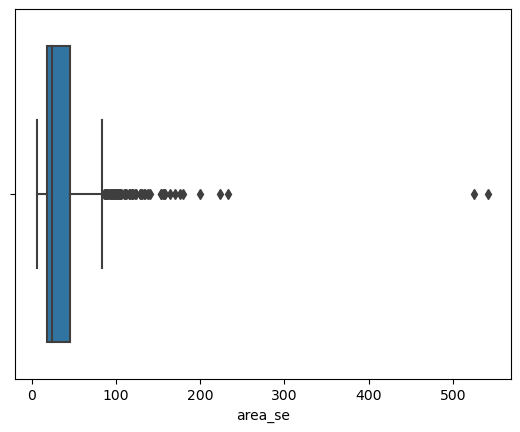

In [36]:
sns.boxplot(x="area_se", data=df)
plt.show()

In [37]:
q1=df['area_se'].quantile(0.25)
q3=df['area_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['area_se']=np.where(df['area_se']>upper,upper,df['area_se'])
df['area_se']=np.where(df['area_se']<lower,lower,df['area_se'])

## smoothness_se

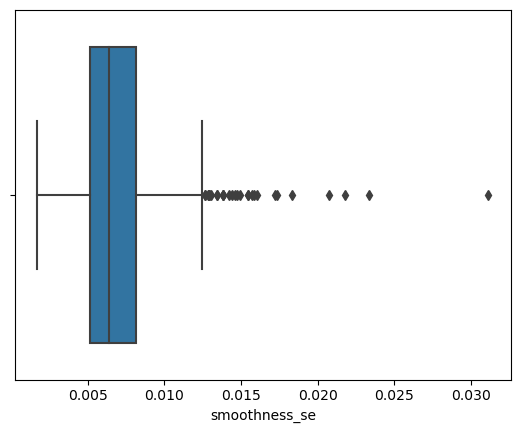

In [38]:
sns.boxplot(x="smoothness_se", data=df)
plt.show()

In [39]:
q1=df['smoothness_se'].quantile(0.25)
q3=df['smoothness_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['smoothness_se']=np.where(df['smoothness_se']>upper,upper,df['smoothness_se'])
df['smoothness_se']=np.where(df['smoothness_se']<lower,lower,df['smoothness_se'])

## compactness_se

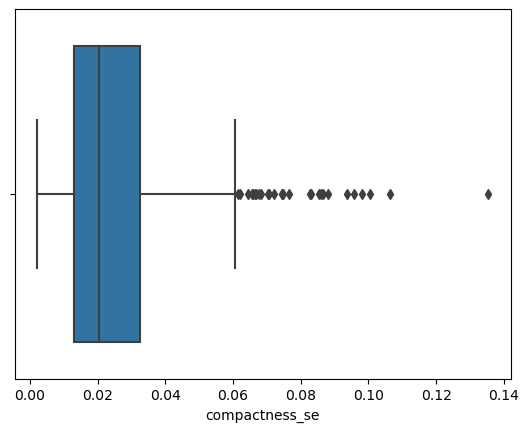

In [40]:
sns.boxplot(x="compactness_se", data=df)
plt.show()

In [41]:
q1=df['compactness_se'].quantile(0.25)
q3=df['compactness_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['compactness_se']=np.where(df['compactness_se']>upper,upper,df['compactness_se'])
df['compactness_se']=np.where(df['compactness_se']<lower,lower,df['compactness_se'])

## concavity_se

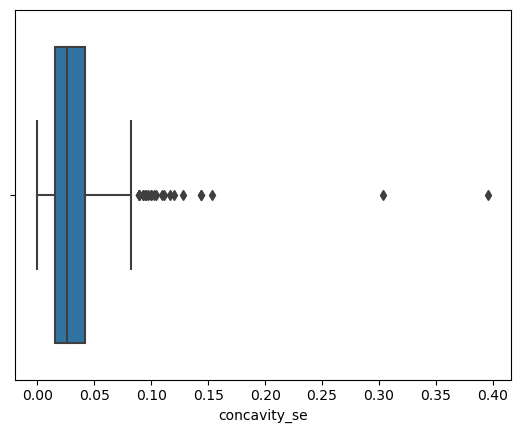

In [42]:
sns.boxplot(x="concavity_se", data=df)
plt.show()

In [43]:
q1=df['concavity_se'].quantile(0.25)
q3=df['concavity_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['concavity_se']=np.where(df['concavity_se']>upper,upper,df['concavity_se'])
df['concavity_se']=np.where(df['concavity_se']<lower,lower,df['concavity_se'])

## concave points_se

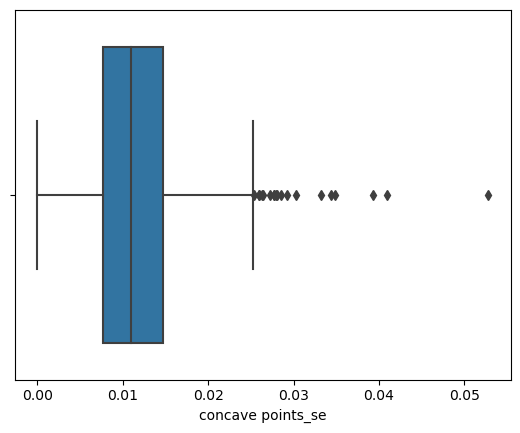

In [44]:
sns.boxplot(x="concave points_se", data=df)
plt.show()

In [45]:
q1=df['concave points_se'].quantile(0.25)
q3=df['concave points_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['concave points_se']=np.where(df['concave points_se']>upper,upper,df['concave points_se'])
df['concave points_se']=np.where(df['concave points_se']<lower,lower,df['concave points_se'])

## symmetry_se

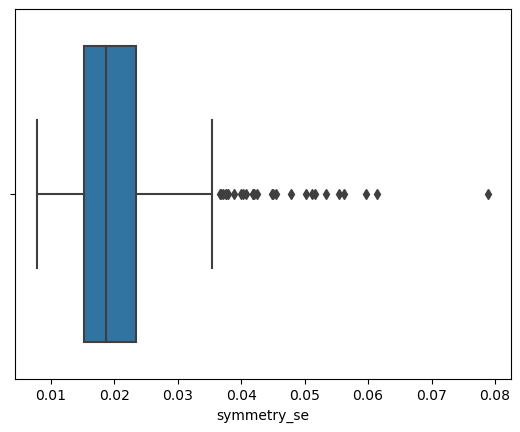

In [46]:
sns.boxplot(x="symmetry_se", data=df)
plt.show()

In [47]:
q1=df['symmetry_se'].quantile(0.25)
q3=df['symmetry_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['symmetry_se']=np.where(df['symmetry_se']>upper,upper,df['symmetry_se'])
df['symmetry_se']=np.where(df['symmetry_se']<lower,lower,df['symmetry_se'])

## fractal_dimension_se

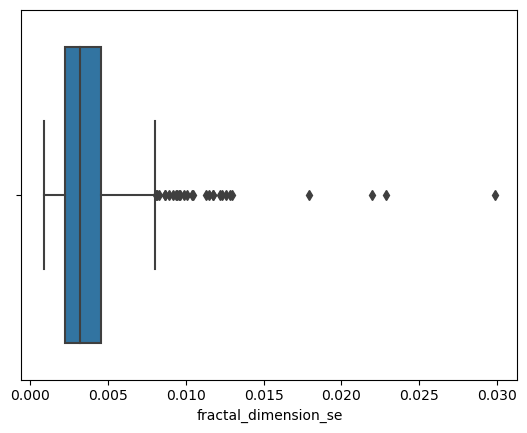

In [48]:
sns.boxplot(x="fractal_dimension_se", data=df)
plt.show()

In [49]:
q1=df['fractal_dimension_se'].quantile(0.25)
q3=df['fractal_dimension_se'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['fractal_dimension_se']=np.where(df['fractal_dimension_se']>upper,upper,df['fractal_dimension_se'])
df['fractal_dimension_se']=np.where(df['fractal_dimension_se']<lower,lower,df['fractal_dimension_se'])

## radius_worst

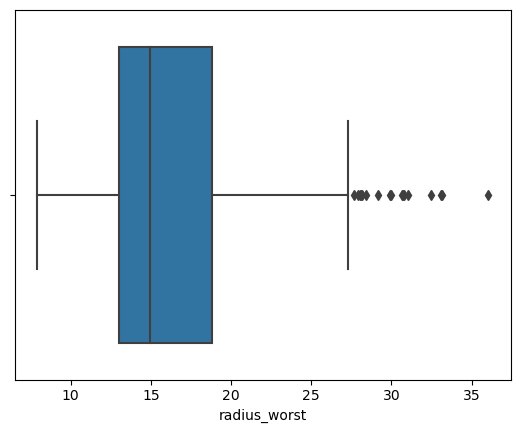

In [50]:
sns.boxplot(x="radius_worst", data=df)
plt.show()

In [51]:
q1=df['radius_worst'].quantile(0.25)
q3=df['radius_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['radius_worst']=np.where(df['radius_worst']>upper,upper,df['radius_worst'])
df['radius_worst']=np.where(df['radius_worst']<lower,lower,df['radius_worst'])

## texture_worst

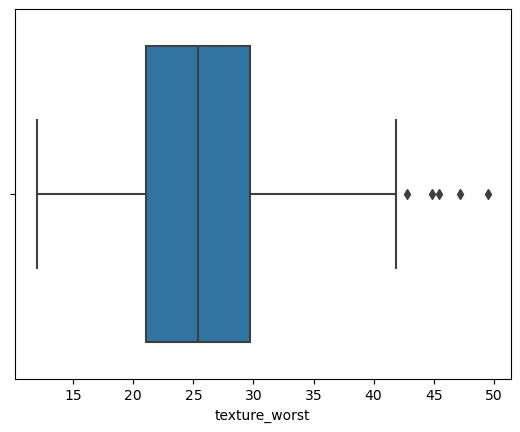

In [52]:
sns.boxplot(x="texture_worst", data=df)
plt.show()

In [53]:
q1=df['texture_worst'].quantile(0.25)
q3=df['texture_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['texture_worst']=np.where(df['texture_worst']>upper,upper,df['texture_worst'])
df['texture_worst']=np.where(df['texture_worst']<lower,lower,df['texture_worst'])

## perimeter_worst

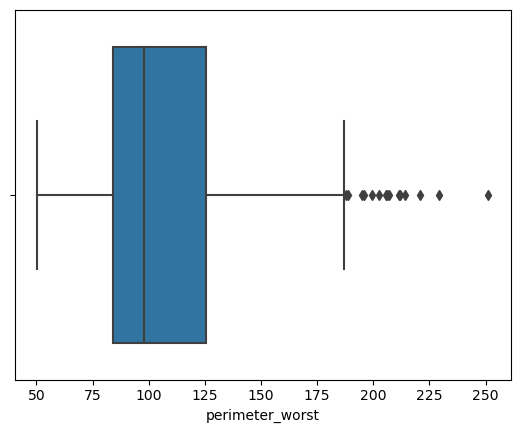

In [54]:
sns.boxplot(x="perimeter_worst", data=df)
plt.show()

In [55]:
q1=df['perimeter_worst'].quantile(0.25)
q3=df['perimeter_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['perimeter_worst']=np.where(df['perimeter_worst']>upper,upper,df['perimeter_worst'])
df['perimeter_worst']=np.where(df['perimeter_worst']<lower,lower,df['perimeter_worst'])

## area_worst

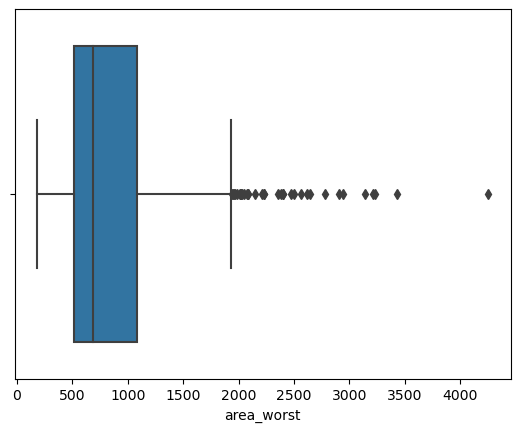

In [56]:
sns.boxplot(x="area_worst", data=df)
plt.show()

In [57]:
q1=df['area_worst'].quantile(0.25)
q3=df['area_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['area_worst']=np.where(df['area_worst']>upper,upper,df['area_worst'])
df['area_worst']=np.where(df['area_worst']<lower,lower,df['area_worst'])

## smoothness_worst

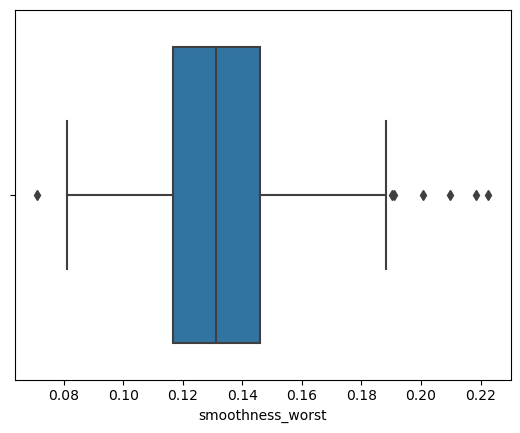

In [58]:
sns.boxplot(x="smoothness_worst", data=df)
plt.show()

In [59]:
q1=df['smoothness_worst'].quantile(0.25)
q3=df['smoothness_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['smoothness_worst']=np.where(df['smoothness_worst']>upper,upper,df['smoothness_worst'])
df['smoothness_worst']=np.where(df['smoothness_worst']<lower,lower,df['smoothness_worst'])

## compactness_worst

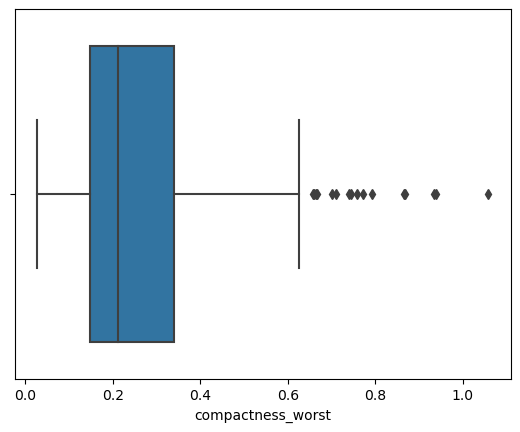

In [60]:
sns.boxplot(x="compactness_worst", data=df)
plt.show()

In [61]:
q1=df['compactness_worst'].quantile(0.25)
q3=df['compactness_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['compactness_worst']=np.where(df['compactness_worst']>upper,upper,df['compactness_worst'])
df['compactness_worst']=np.where(df['compactness_worst']<lower,lower,df['compactness_worst'])

## concavity_worst

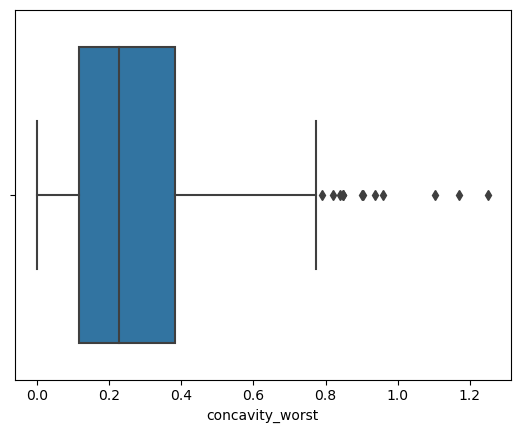

In [62]:
sns.boxplot(x="concavity_worst", data=df)
plt.show()

In [63]:
q1=df['concavity_worst'].quantile(0.25)
q3=df['concavity_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['concavity_worst']=np.where(df['concavity_worst']>upper,upper,df['concavity_worst'])
df['concavity_worst']=np.where(df['concavity_worst']<lower,lower,df['concavity_worst'])

## concave points_worst

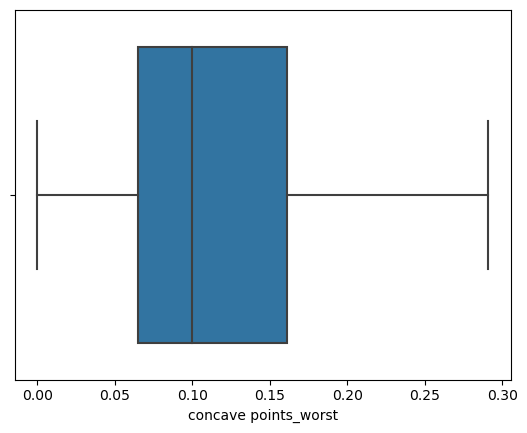

In [64]:
sns.boxplot(x="concave points_worst", data=df)
plt.show()

In [65]:
q1=df['concave points_worst'].quantile(0.25)
q3=df['concave points_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['concave points_worst']=np.where(df['concave points_worst']>upper,upper,df['concave points_worst'])
df['concave points_worst']=np.where(df['concave points_worst']<lower,lower,df['concave points_worst'])

## symmetry_worst

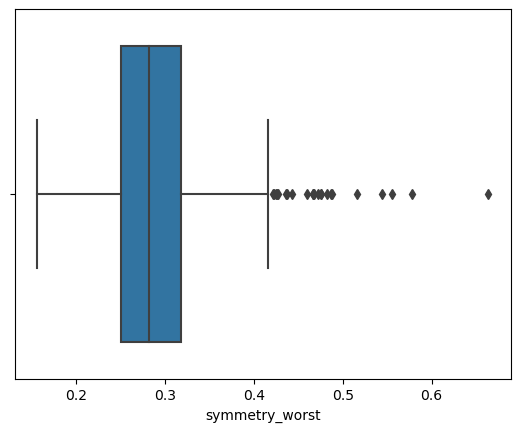

In [66]:
sns.boxplot(x="symmetry_worst", data=df)
plt.show()

In [67]:
q1=df['symmetry_worst'].quantile(0.25)
q3=df['symmetry_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['symmetry_worst']=np.where(df['symmetry_worst']>upper,upper,df['symmetry_worst'])
df['symmetry_worst']=np.where(df['symmetry_worst']<lower,lower,df['symmetry_worst'])

## fractal_dimension_worst

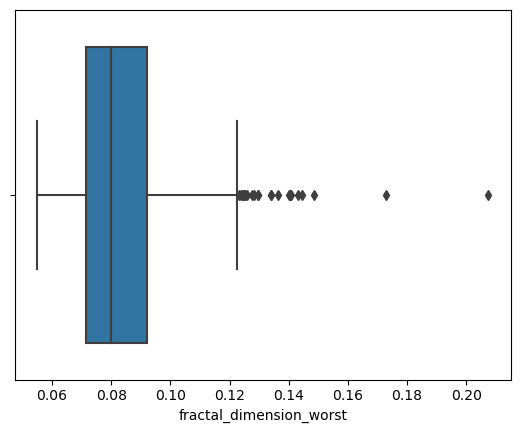

In [68]:
sns.boxplot(x="fractal_dimension_worst", data=df)
plt.show()

In [69]:
q1=df['fractal_dimension_worst'].quantile(0.25)
q3=df['fractal_dimension_worst'].quantile(0.75)
iqr=q3-q1
lower=q1- 1.5*iqr
upper=q3+1.5*iqr
df['fractal_dimension_worst']=np.where(df['fractal_dimension_worst']>upper,upper,df['fractal_dimension_worst'])
df['fractal_dimension_worst']=np.where(df['fractal_dimension_worst']<lower,lower,df['fractal_dimension_worst'])

## scaling

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler() 
df_scaled = scaler.fit_transform(df.iloc[:, 1:])

In [72]:
df_scaled = pd.DataFrame(df_scaled, columns=df.iloc[:, 1:].columns.tolist())

In [73]:
df_scaled  #scaled columns except target

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,2.280613,-0.603532,2.343091,2.110995,-0.197982,1.639184,1.152362,0.778698,1.520305,1.462719,2.006477,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,0.780609,-0.956881,0.498609,1.611678,-0.685568,-0.768782,-0.556348,0.328106,-0.937631,-0.033315,1.921384,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,1.774057,-0.847619,1.345409,2.110995,-0.301397,1.037862,0.402825,1.637925,0.373573,0.550819,1.611558,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,0.545151,-0.086703,0.532139,-0.318438,0.927950,2.473870,1.292444,1.289491,2.423376,2.491558,-0.277945,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,1.831079,-0.859164,1.953934,2.110995,1.916411,0.003294,1.305576,1.322328,-0.378732,0.856659,1.386825,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,-0.994068,2.280613,0.119452,2.343091,2.110995,1.422181,0.291232,1.067242,2.360332,-1.356424,0.364166,2.021750,0.124241,1.860170,2.287627,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016
565,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,-1.134424,1.871878,2.548261,1.786287,2.110995,-0.459634,-0.022152,0.460220,0.944706,-0.162482,-0.614637,1.637740,2.083216,1.512531,1.854045,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155
566,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,-0.955080,0.352458,-0.253688,0.517871,0.559899,-0.403981,0.853716,0.839609,0.723970,-1.045756,0.169080,0.610078,1.400468,0.626208,0.576760,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817
567,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,1.178328,1.677711,0.818315,2.192208,2.110995,-0.146898,2.473870,2.000636,0.919166,0.486266,1.458221,2.085025,2.276634,2.439568,2.043428,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456


In [74]:
df1 = df_scaled.join(df['diagnosis'])

In [75]:
df1 # new df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.176800,-2.121200,1.357375,1.184085,1.618861,2.541404,2.647422,2.620973,2.348535,2.511708,2.280613,-0.603532,2.343091,2.110995,-0.197982,1.639184,1.152362,0.778698,1.520305,1.462719,2.006477,-1.375159,2.439568,2.287627,1.344848,2.641905,2.246192,2.296076,2.443918,2.225247,M
1,1.949929,-0.354875,1.795991,2.249396,-0.842995,-0.498189,-0.000497,0.574944,0.017882,-0.925449,0.780609,-0.956881,0.498609,1.611678,-0.685568,-0.768782,-0.556348,0.328106,-0.937631,-0.033315,1.921384,-0.370048,1.631542,2.287627,-0.377098,-0.443388,-0.137634,1.087084,-0.234408,0.355314,M
2,1.686226,0.476899,1.670052,1.846217,0.975239,1.148680,1.496076,2.110330,1.004666,-0.407692,1.774057,-0.847619,1.345409,2.110995,-0.301397,1.037862,0.402825,1.637925,0.373573,0.550819,1.611558,-0.019582,1.434234,1.807751,0.546654,1.223448,0.920718,1.955000,1.369057,0.265197,M
3,-0.791983,0.268955,-0.606410,-0.831485,2.737521,2.541404,2.091997,1.506601,2.521318,2.517947,0.545151,-0.086703,0.532139,-0.318438,0.927950,2.473870,1.292444,1.289491,2.423376,2.491558,-0.277945,0.140773,-0.245395,-0.593838,2.595949,2.641905,2.119474,2.175786,2.443918,2.482456,M
4,1.866023,-1.174698,1.891531,2.154338,0.295047,0.599453,1.504202,1.482665,0.006363,-0.588595,1.831079,-0.859164,1.953934,2.110995,1.916411,0.003294,1.305576,1.322328,-0.378732,0.856659,1.386825,-1.484267,1.424838,1.525780,0.232758,-0.314469,0.665254,0.729259,-0.951602,-0.410683,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.246595,0.749377,2.191180,2.250380,1.077633,0.256947,2.125856,2.402886,-0.312326,-0.994068,2.280613,0.119452,2.343091,2.110995,1.422181,0.291232,1.067242,2.360332,-1.356424,0.364166,2.021750,0.124241,1.860170,2.287627,0.394190,-0.270329,0.719489,1.629151,-1.516438,-0.763016,M
565,1.818077,2.150007,1.722165,2.036334,0.112199,0.003614,0.772845,1.312717,-0.212495,-1.134424,1.871878,2.548261,1.786287,2.110995,-0.459634,-0.022152,0.460220,0.944706,-0.162482,-0.614637,1.637740,2.083216,1.512531,1.854045,-0.699963,-0.404152,0.267358,0.733827,-0.565135,-1.062155,M
566,0.760269,2.109375,0.727678,0.715676,-0.856891,-0.018680,0.075483,0.118824,-0.834515,-0.955080,0.352458,-0.253688,0.517871,0.559899,-0.403981,0.853716,0.839609,0.723970,-1.045756,0.169080,0.610078,1.400468,0.626208,0.576760,-0.821037,0.417005,0.362650,0.414069,-1.222872,-0.321817,M
567,1.958919,2.408144,2.108668,2.049446,1.574978,2.541404,2.647422,2.751293,2.264063,1.178328,1.677711,0.818315,2.192208,2.110995,-0.146898,2.473870,2.000636,0.919166,0.486266,1.458221,2.085025,2.276634,2.439568,2.043428,1.470406,2.641905,2.619251,2.289985,2.249756,2.482456,M


In [76]:
df1.rename(columns={'concave points_mean': 'concave_points_mean'}, inplace=True)

In [77]:
df1.rename(columns={'concave points_se': 'concave_points_se'}, inplace=True)

In [78]:
df1.rename(columns={'concave points_worst': 'concave_points_worst'}, inplace=True)

## ANOVA

In [81]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [82]:
columns = df1.iloc[:, 0:30]

In [83]:
for col in columns:
    model = ols(f'{col} ~ diagnosis', data = df1).fit()
    anova = sm.stats.anova_lm(model, type = 2) 
    print(f'ANOVA for {col}') 
    print(anova.round(decimals=5))  
    print('\n')

ANOVA for radius_mean
              df     sum_sq    mean_sq          F  PR(>F)
diagnosis    1.0  315.99328  315.99328  708.15587     0.0
Residual   567.0  253.00672    0.44622        NaN     NaN


ANOVA for texture_mean
              df    sum_sq   mean_sq          F  PR(>F)
diagnosis    1.0   99.9527  99.95270  120.82615     0.0
Residual   567.0  469.0473   0.82724        NaN     NaN


ANOVA for perimeter_mean
              df     sum_sq    mean_sq          F  PR(>F)
diagnosis    1.0  327.79502  327.79502  770.54699     0.0
Residual   567.0  241.20498    0.42541        NaN     NaN


ANOVA for area_mean
              df     sum_sq    mean_sq          F  PR(>F)
diagnosis    1.0  322.44455  322.44455  741.52107     0.0
Residual   567.0  246.55545    0.43484        NaN     NaN


ANOVA for smoothness_mean
              df     sum_sq   mean_sq         F  PR(>F)
diagnosis    1.0   76.60911  76.60911  88.21723     0.0
Residual   567.0  492.39089   0.86841       NaN     NaN


ANOVA for compac

## converting target to contineous 

In [84]:
from sklearn.preprocessing import LabelEncoder

In [85]:
lab = LabelEncoder()

In [86]:
df['diagnosis'] = lab.fit_transform(df['diagnosis'])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = df1.drop('diagnosis', axis = 1)
y = df1['diagnosis']

In [89]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, stratify = y, test_size = 0.25, random_state = 42)

## Data Balancing

In [92]:
from imblearn.over_sampling import SMOTE

In [93]:
smt = SMOTE(random_state = 0)

# Data Balancing
xtrain_res, ytrain_res = smt.fit_resample(xtrain, ytrain)

print(f'Distribution BEFORE balancing:\n{ytrain.value_counts()}')
print('=-'*16)
print(f'Distribution AFTER balancing:\n{ytrain_res.value_counts()}')

Distribution BEFORE balancing:
B    267
M    159
Name: diagnosis, dtype: int64
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-
Distribution AFTER balancing:
B    267
M    267
Name: diagnosis, dtype: int64


## Training Logistic regression

In [107]:
from sklearn.metrics import accuracy_score


In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
lg= LogisticRegression( random_state = 0)
lg.fit(xtrain_res, ytrain_res)

LogisticRegression(random_state=0)

In [110]:
pred = lg.predict(xtest)

In [111]:
accuracy = accuracy_score(ytest, pred)
print(accuracy)

0.972027972027972


## Good model